# Proyect Data Science Students Social Media Addiction

## Phase 1: Dataset selection

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn as sk

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Curso Data Science/Students Social Media Addiction.csv')

I chose this dataset about students' social media addiction. It is of interest to my project because I am studying Psychology and wish to be a researcher in the future, so it could serve as a basis for projects I undertake later.

## Phase 2: Data exploration

In [ ]:
df

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4


In [ ]:
df.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


In [ ]:
df.columns

Index(['Student_ID', 'Age', 'Gender', 'Academic_Level', 'Country',
       'Avg_Daily_Usage_Hours', 'Most_Used_Platform',
       'Affects_Academic_Performance', 'Sleep_Hours_Per_Night',
       'Mental_Health_Score', 'Relationship_Status',
       'Conflicts_Over_Social_Media', 'Addicted_Score'],
      dtype='object')

### Variable Dictionary

Student_ID: Unique identifier of the respondent.

Age: Age in years.

Gender: Gender ("Male" or "Female").

Academic_Level: Academic level (High School / Undergraduate / Graduate).

Country: Country of residence.

Avg_Daily_Usage_Hours: Average daily hours on social media.

Most_Used_Platform: Most used platform (Instagram, Facebook, TikTok, etc.).

Affects_Academic_Performance: Self-reported impact on academic performance (Yes/No).

Sleep_Hours_Per_Night: Average hours of sleep per night.

Mental_Health_Score: Self-assessment of mental health (1 = poor to 10 = excellent).

Relationship_Status: Relationship Status (Single / In Relationship / Complicated).

Conflicts_Over_Social_Media: Number of relationship conflicts due to social media.

Addicted_Score: Social media addiction score (1 = low to 10 = high).

## Phase 3: Data cleaning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the original DataFrame
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Curso Data Science/Students Social Media Addiction.csv')
print("Original DataFrame loaded.")

# Apply cleaning: remove whitespace from categorical columns (keeping capitalization)
categorical_columns = df.select_dtypes(include='object').columns
for col in categorical_columns:
    df[col] = df[col].str.strip()
print("Whitespace removed from categorical columns.")

# Apply cleaning: remove outliers from 'Avg_Daily_Usage_Hours'
col_outlier = 'Avg_Daily_Usage_Hours'
Q1 = df[col_outlier].quantile(0.25)
Q3 = df[col_outlier].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df[(df[col_outlier] >= lower_bound) & (df[col_outlier] <= upper_bound)].copy()
print(f"Outliers removed from '{col_outlier}'. Clean DataFrame shape: {df_cleaned.shape}")

Original DataFrame loaded.
Whitespace removed from categorical columns.
Outliers removed from 'Avg_Daily_Usage_Hours'. Clean DataFrame shape: (702, 13)


In [ ]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
display(missing_info)

,Missing Values,Percentage
Student_ID,0,0.0
Age,0,0.0
Gender,0,0.0
Academic_Level,0,0.0
Country,0,0.0
Avg_Daily_Usage_Hours,0,0.0
Most_Used_Platform,0,0.0
Affects_Academic_Performance,0,0.0
Sleep_Hours_Per_Night,0,0.0
Mental_Health_Score,0,0.0


No missing values are seen, so no inference will be made on any column for the moment.

Next, I will look for inconsistencies in the categorical columns.

In [ ]:
categorical_columns = df.select_dtypes(include='object').columns
print("Categorical columns:")
print(categorical_columns)

for col in categorical_columns:
    print(f"\nUnique values in '{col}':")
    unique_values = df[col].unique()
    print(unique_values)

    # Remove leading and trailing whitespace
    df[col] = df[col].str.strip()

    print(f"\nUnique values in '{col}' after cleaning (removing only whitespace):")
    unique_values_cleaned = df[col].unique()
    print(unique_values_cleaned)

Categorical columns:
Index(['Gender', 'Academic_Level', 'Country', 'Most_Used_Platform',
       'Affects_Academic_Performance', 'Relationship_Status'],
      dtype='object')

Unique values in 'Gender':
['Female' 'Male']

Unique values in 'Gender' after cleaning (removing only whitespace):
['Female' 'Male']

Unique values in 'Academic_Level':
['Undergraduate' 'Graduate' 'High School']

Unique values in 'Academic_Level' after cleaning (removing only whitespace):
['Undergraduate' 'Graduate' 'High School']

Unique values in 'Country':
['Bangladesh' 'India' 'USA' 'UK' 'Canada' 'Australia' 'Germany' 'Brazil'
 'Japan' 'South Korea' 'France' 'Spain' 'Italy' 'Mexico' 'Russia' 'China'
 'Sweden' 'Norway' 'Denmark' 'Netherlands' 'Belgium' 'Switzerland'
 'Austria' 'Portugal' 'Greece' 'Ireland' 'New Zealand' 'Singapore'
 'Malaysia' 'Thailand' 'Vietnam' 'Philippines' 'Indonesia' 'Taiwan'
 'Hong Kong' 'Turkey' 'Israel' 'UAE' 'Egypt' 'Morocco' 'South Africa'
 'Nigeria' 'Kenya' 'Ghana' 'Argentina' 'Chil

No se localizaron inconsistencias por lo que tampoco se eliminará ninguna columna ni se reemplazará ningún valor.

No inconsistencies were found, so no columns will be dropped or values replaced.

Ahora voy a generar un diagrama de caja para las columnas numéricas así reconocer valores atípicos, calculando tambien el rango intercuartil para delimitar el bigote (límite para los valores típicos).

Now I will generate a box plot for the numerical columns to identify outliers, also calculating the interquartile range to define the whiskers (limit for typical values).

Numerical columns:
Index(['Student_ID', 'Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night',
       'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score'],
      dtype='object')


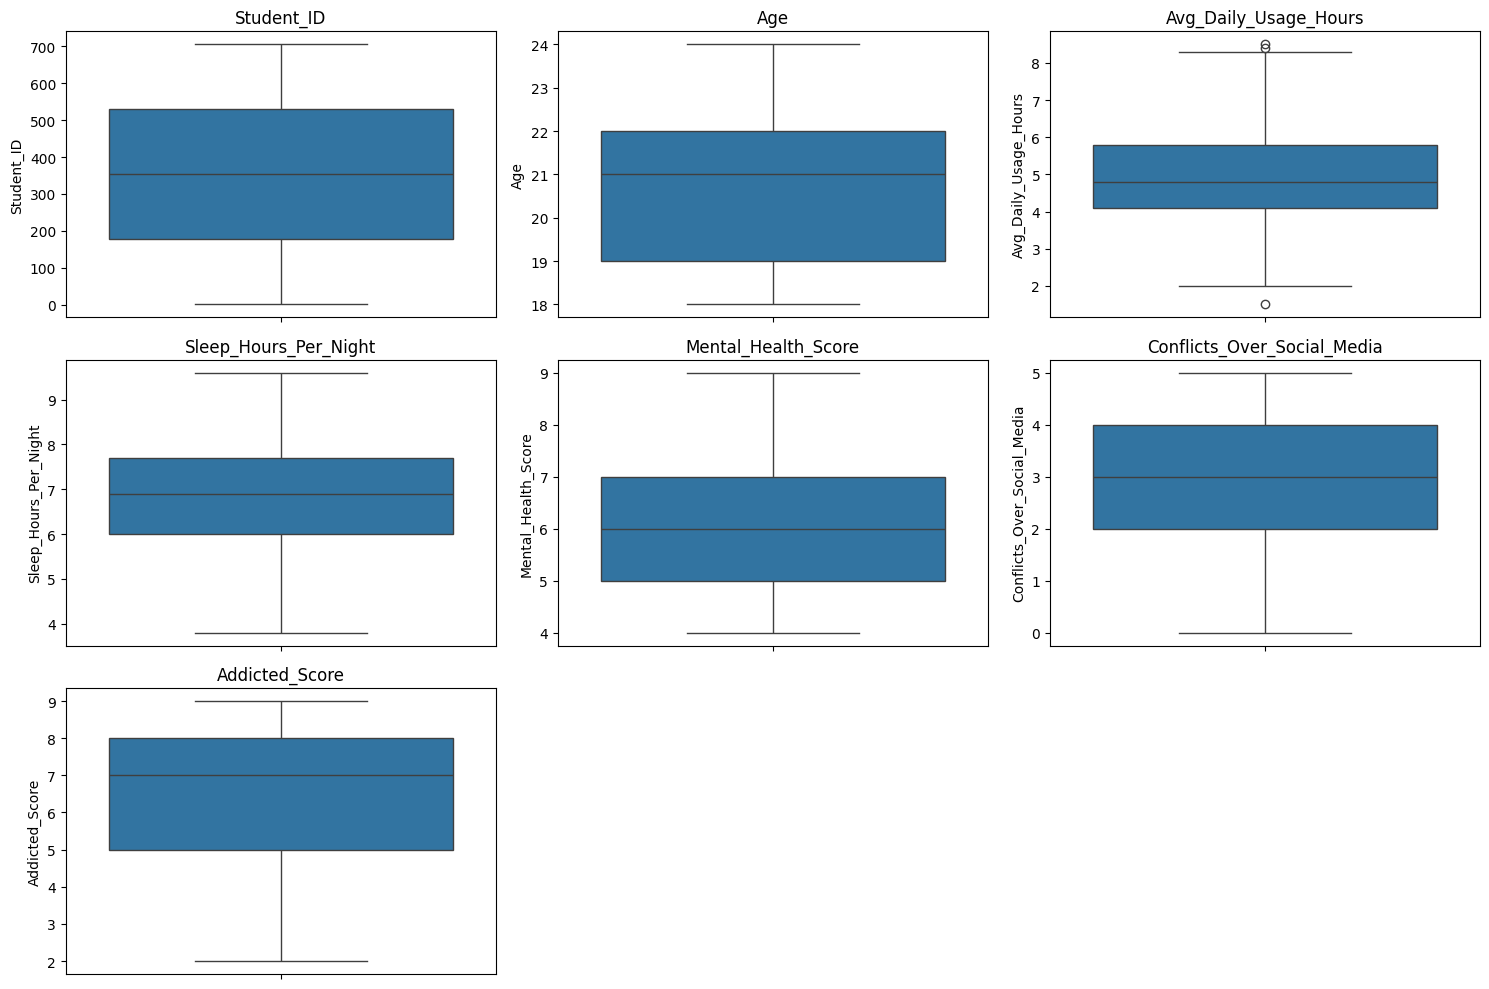


Outlier Information (IQR Method):

Column: Student_ID
Q1: 177.0
Q3: 529.0
IQR: 352.0
Lower Limit: -351.0
Upper Limit: 1057.0
Outlier Count: 0

Column: Age
Q1: 19.0
Q3: 22.0
IQR: 3.0
Lower Limit: 14.5
Upper Limit: 26.5
Outlier Count: 0

Column: Avg_Daily_Usage_Hours
Q1: 4.1
Q3: 5.8
IQR: 1.7000000000000002
Lower Limit: 1.5499999999999994
Upper Limit: 8.35
Outlier Count: 3

Column: Sleep_Hours_Per_Night
Q1: 6.0
Q3: 7.7
IQR: 1.7000000000000002
Lower Limit: 3.4499999999999997
Upper Limit: 10.25
Outlier Count: 0

Column: Mental_Health_Score
Q1: 5.0
Q3: 7.0
IQR: 2.0
Lower Limit: 2.0
Upper Limit: 10.0
Outlier Count: 0

Column: Conflicts_Over_Social_Media
Q1: 2.0
Q3: 4.0
IQR: 2.0
Lower Limit: -1.0
Upper Limit: 7.0
Outlier Count: 0

Column: Addicted_Score
Q1: 5.0
Q3: 8.0
IQR: 3.0
Lower Limit: 0.5
Upper Limit: 12.5
Outlier Count: 0


In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns
print("Numerical columns:")
print(numerical_cols)

# Generate box plots for numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Calculate IQR and limits for outliers
outlier_info = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = outliers.shape[0]
    outlier_info[col] = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Limit': lower_bound,
        'Upper Limit': upper_bound,
        'Outlier Count': outlier_count
    }

print("\nOutlier Information (IQR Method):")
for col, info in outlier_info.items():
    print(f"\nColumn: {col}")
    for key, value in info.items():
        print(f"{key}: {value}")

Based on the analysis of outliers through the box and whisker plot, which showed that only the 'Avg_Daily_Usage_Hours' column has outliers (exactly 3), I will proceed to remove these values and regenerate another box and whisker plot to ensure they have been removed.

En base a la salida del analisis de los valores atípicos mediante el diagrama de caja y bigotes que mostró que solo la columna 'Avg_Daily_Usage_Hours' tiene valores atípicos (exactamente la cantidad de 3), procederé a eliminar estos valores y volver a generar otro diagrama de caja y bigotes para asegurarme de que hayan sido eliminados.

Original DataFrame shape: (705, 13)
Clean DataFrame shape after removing outliers from 'Avg_Daily_Usage_Hours': (702, 13)


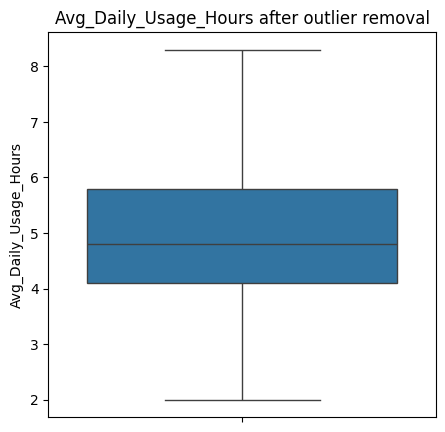

In [ ]:
# Remove outliers from 'Avg_Daily_Usage_Hours'
col = 'Avg_Daily_Usage_Hours'
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)].copy()

print(f"Original DataFrame shape: {df.shape}")
print(f"Clean DataFrame shape after removing outliers from '{col}': {df_cleaned.shape}")

# Verify the removal by replotting the box plot for the cleaned column
plt.figure(figsize=(5, 5))
sns.boxplot(y=df_cleaned[col])
plt.title(f'{col} after outlier removal')
plt.show()

Ahora para asegurar que los valores faltantes, inconsistentes y atípicos han sido tratados, realizaré otra verificación.


Now, to ensure that missing, inconsistent, and outlier values have been handled, I will perform another verification.

Missing values in df_cleaned:
Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

Unique values in categorical columns of df_cleaned (after cleaning):

Column: Gender


array(['Female', 'Male'], dtype=object)


Column: Academic_Level


array(['Undergraduate', 'Graduate', 'High School'], dtype=object)


Column: Country


array(['Bangladesh', 'India', 'USA', 'UK', 'Canada', 'Australia',
       'Brazil', 'Japan', 'South Korea', 'France', 'Spain', 'Italy',
       'Mexico', 'Russia', 'China', 'Sweden', 'Norway', 'Denmark',
       'Netherlands', 'Belgium', 'Switzerland', 'Austria', 'Portugal',
       'Greece', 'Ireland', 'New Zealand', 'Singapore', 'Malaysia',
       'Thailand', 'Vietnam', 'Philippines', 'Indonesia', 'Taiwan',
       'Hong Kong', 'Turkey', 'Israel', 'UAE', 'Egypt', 'Morocco',
       'South Africa', 'Nigeria', 'Kenya', 'Ghana', 'Argentina', 'Chile',
       'Colombia', 'Peru', 'Venezuela', 'Ecuador', 'Uruguay', 'Paraguay',
       'Bolivia', 'Costa Rica', 'Panama', 'Jamaica', 'Trinidad',
       'Bahamas', 'Iceland', 'Finland', 'Poland', 'Romania', 'Hungary',
       'Czech Republic', 'Slovakia', 'Croatia', 'Serbia', 'Slovenia',
       'Bulgaria', 'Estonia', 'Latvia', 'Lithuania', 'Ukraine', 'Moldova',
       'Belarus', 'Kazakhstan', 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Armenia', 'G


Column: Most_Used_Platform


array(['Instagram', 'Twitter', 'TikTok', 'YouTube', 'Facebook',
       'Snapchat', 'LinkedIn', 'LINE', 'KakaoTalk', 'VKontakte',
       'WhatsApp', 'WeChat'], dtype=object)


Column: Affects_Academic_Performance


array(['Yes', 'No'], dtype=object)


Column: Relationship_Status


array(['In Relationship', 'Single', 'Complicated'], dtype=object)

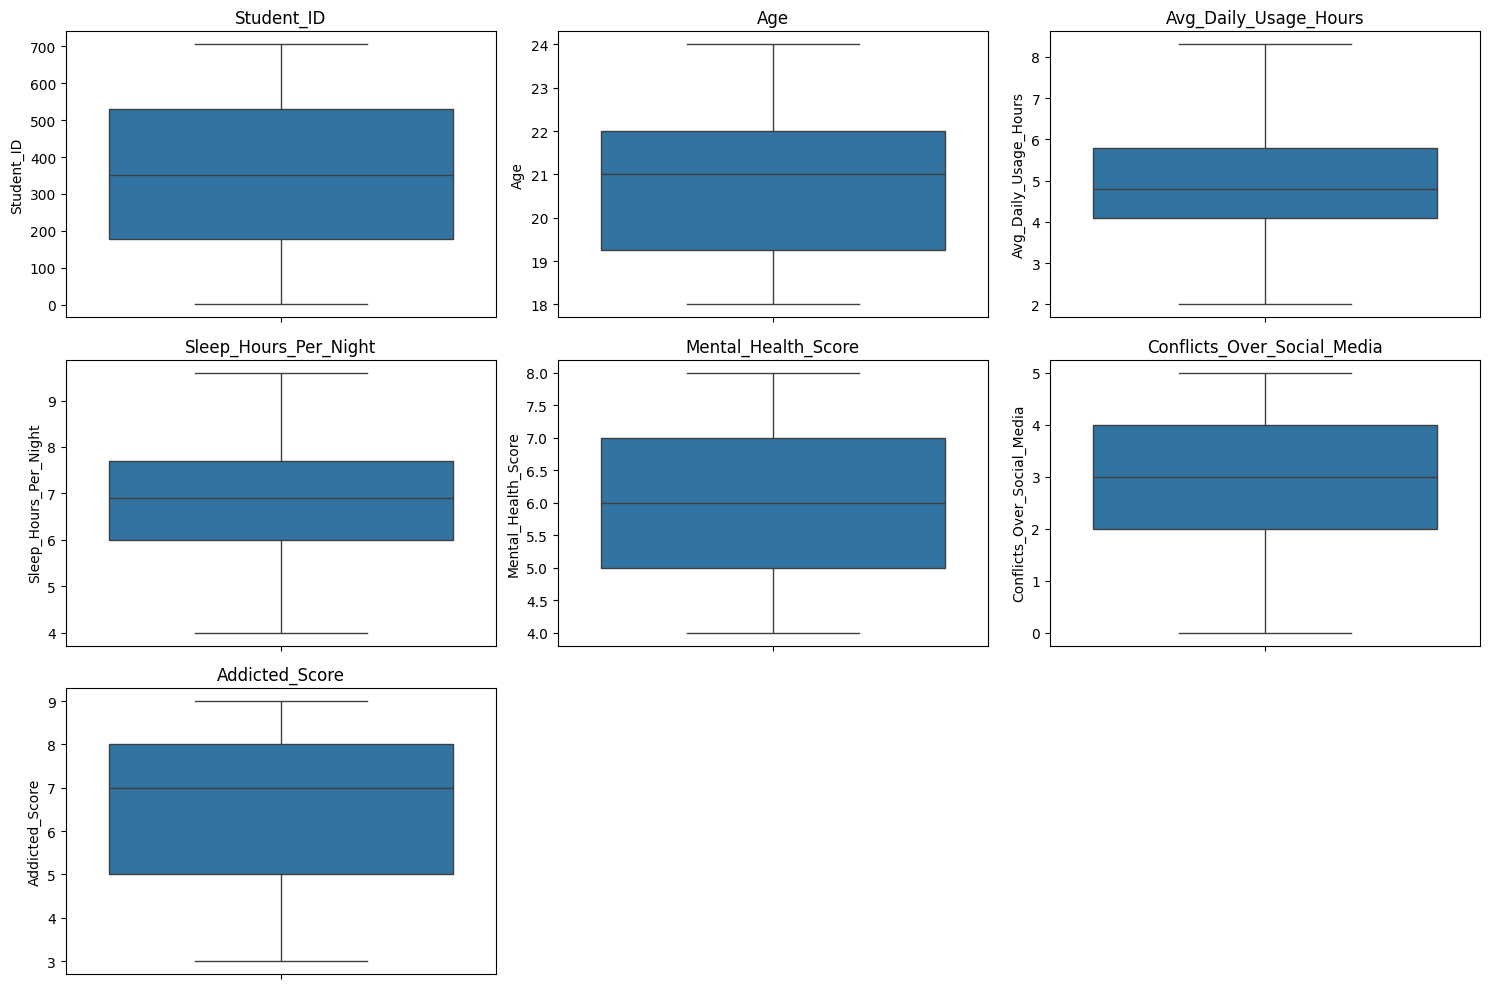

In [ ]:
# 1. Check for missing values in the df_cleaned DataFrame
missing_values_cleaned = df_cleaned.isnull().sum()
print("Missing values in df_cleaned:")
print(missing_values_cleaned)

# 2. Confirm that the categorical columns in df_cleaned contain consistent values
categorical_columns_cleaned = df_cleaned.select_dtypes(include='object').columns
print("\nUnique values in categorical columns of df_cleaned (after cleaning):")
for col in categorical_columns_cleaned:
    print(f"\nColumn: {col}")
    display(df_cleaned[col].unique())

# 3. Re-generate box plots for the numerical columns in df_cleaned
numerical_cols_cleaned = df_cleaned.select_dtypes(include=np.number).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_cleaned):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df_cleaned[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## Phase 4: Statistical analysis

I will now proceed to perform a descriptive statistical analysis by calculating measures of central tendency such as mean, median, standard deviation, quartiles, and distributions for the numerical columns.

Numerical columns for descriptive analysis:
['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']

Descriptive Statistics for Numerical Columns:


,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000
mean,20.659544,4.913533,6.875926,6.226496,2.850427,6.435897
std,1.397793,1.239162,1.116842,1.100504,0.951982,1.575768
min,18.000000,2.000000,4.000000,4.000000,0.000000,3.000000
25%,19.250000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,24.000000,8.300000,9.600000,8.000000,5.000000,9.000000


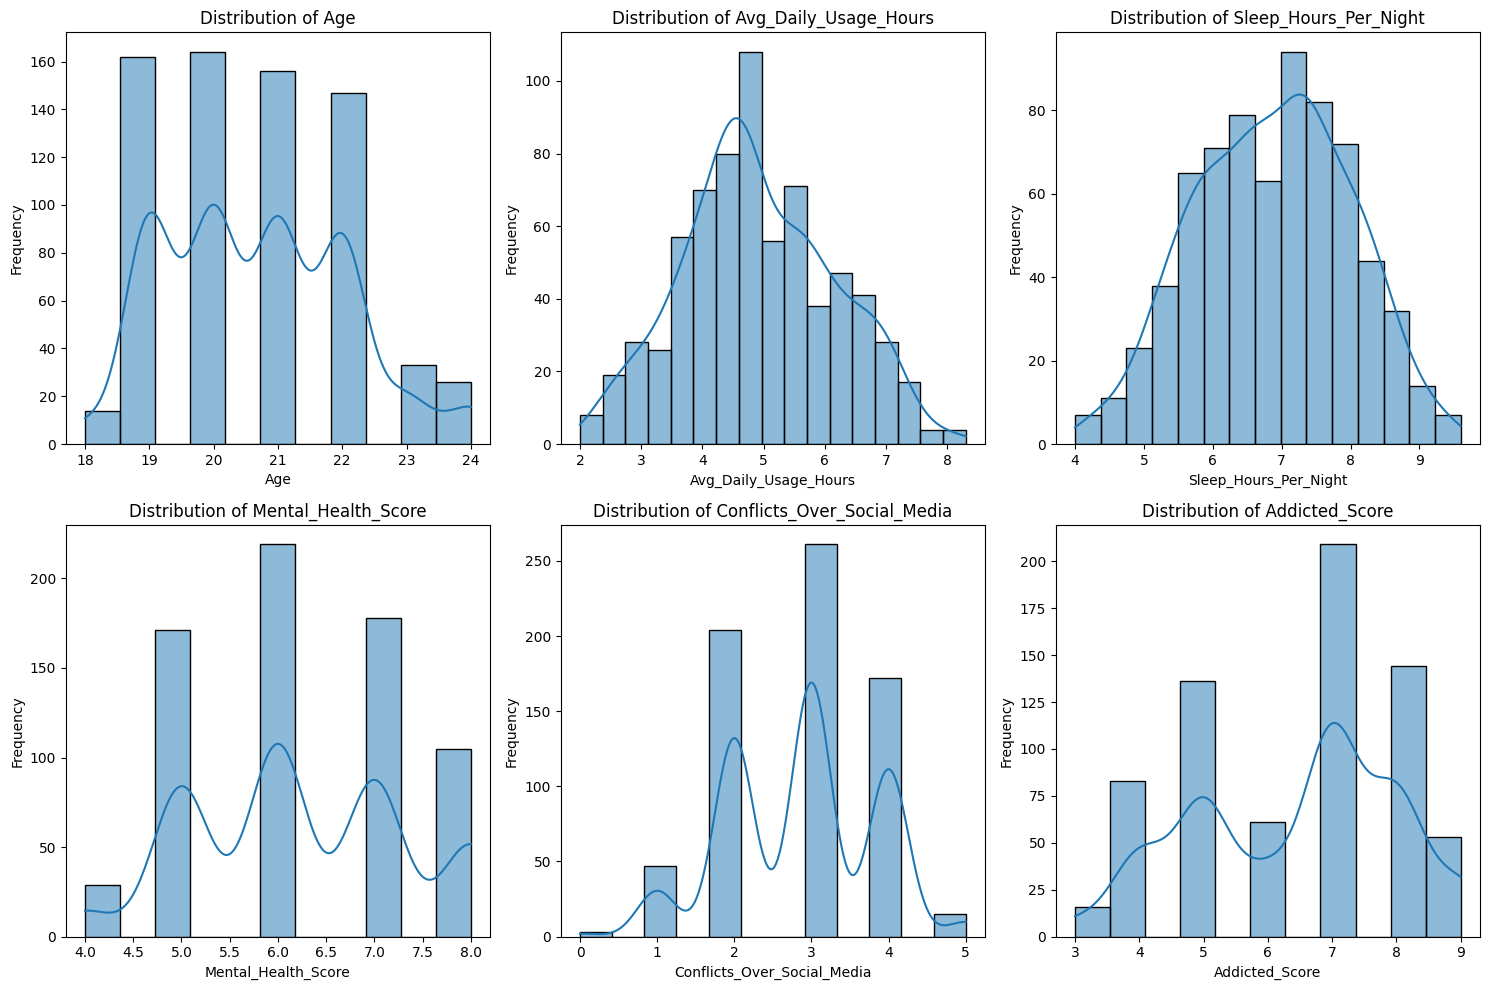

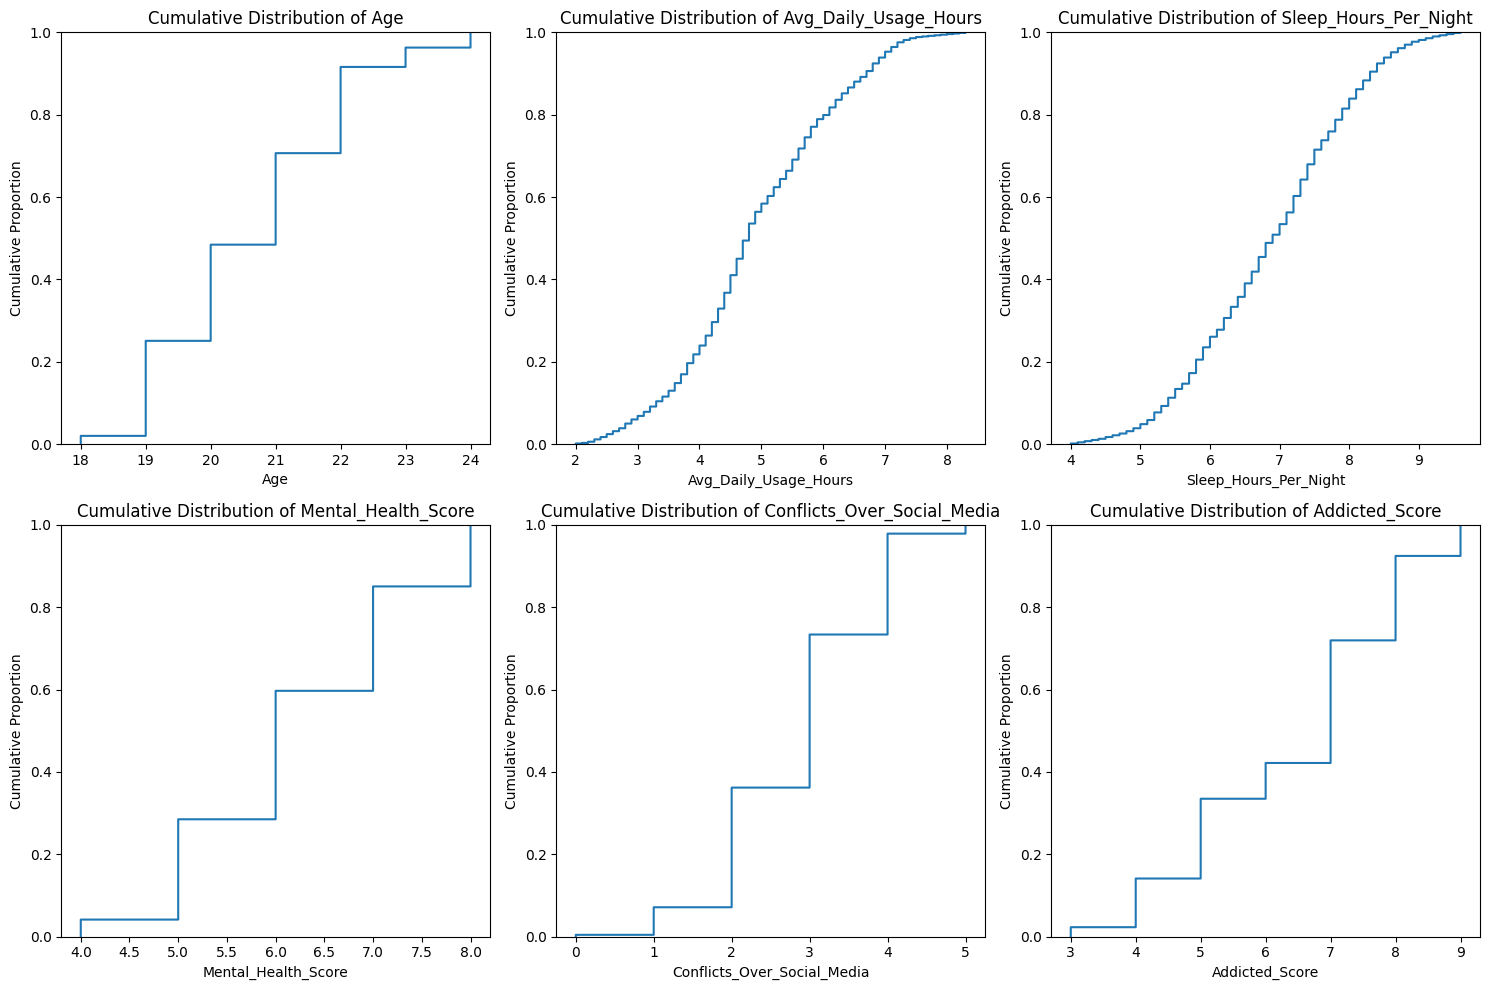

In [ ]:
# 1. Calculate descriptive statistics for numerical columns in df_cleaned
numerical_cols_cleaned = df_cleaned.select_dtypes(include=np.number).columns.tolist()
# Exclude 'Student_ID' from numerical columns for descriptive analysis
if 'Student_ID' in numerical_cols_cleaned:
    numerical_cols_cleaned.remove('Student_ID')

print("Numerical columns for descriptive analysis:")
print(numerical_cols_cleaned)

# Calculate descriptive statistics for the selected numerical columns
print("\nDescriptive Statistics for Numerical Columns:")
descriptive_stats = df_cleaned[numerical_cols_cleaned].describe()
display(descriptive_stats)

# 2. Generate histograms for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_cleaned):
    plt.subplot(2, 3, i + 1) # Adjust layout for 2 rows and 3 columns
    sns.histplot(data=df_cleaned, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 3. Generate cumulative distribution plots (ECDF) for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_cleaned):
    plt.subplot(2, 3, i + 1) # Adjust layout for 2 rows and 3 columns
    sns.ecdfplot(data=df_cleaned, x=col)
    plt.title(f'Cumulative Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Cumulative Proportion')
plt.tight_layout()
plt.show()

According to the graphs and the calculated measures of central tendency, the following conclusions can be drawn:

* The average age of the students is 20.66 years, with a standard deviation of 1.40. Therefore, it could be assumed that most students are between 19.26 and 22.06 years old. As age is measured in whole numbers, the average age is close to 21 years and most students are between 19 and 22 years old.
* Students spend an average of 4.91 hours daily on their phones, and most sleep between 6 and 8 hours per night.
* The self-assessment of students' mental health is on average 6.23 (Mean), with a standard deviation of 1.10.
* The average number of relationship conflicts related to social media is 2.85 and the average social media addiction score is 6.44 (also the mean).

Now I will perform a descriptive analysis of the categorical variables, calculating and visualizing frequencies and proportions.

Categorical columns in df_cleaned:
Index(['Gender', 'Academic_Level', 'Country', 'Most_Used_Platform',
       'Affects_Academic_Performance', 'Relationship_Status'],
      dtype='object')

Frequency Counts and Proportions for Categorical Columns:

Column: Gender


,Frequency,Proportion (%)
Gender,,
Female,351,50.0
Male,351,50.0



Column: Academic_Level


,Frequency,Proportion (%)
Academic_Level,,
Undergraduate,351,50.000000
Graduate,324,46.153846
High School,27,3.846154



Column: Country


,Frequency,Proportion (%)
Country,,
India,53,7.549858
USA,38,5.413105
Canada,34,4.843305
Mexico,27,3.846154
Spain,27,3.846154
...,...,...
Jordan,1,0.142450
Oman,1,0.142450
Afghanistan,1,0.142450



Column: Most_Used_Platform


,Frequency,Proportion (%)
Most_Used_Platform,,
Instagram,248,35.327635
TikTok,153,21.794872
Facebook,123,17.521368
WhatsApp,54,7.692308
Twitter,30,4.273504
LinkedIn,20,2.849003
WeChat,15,2.136752
Snapchat,13,1.851852
VKontakte,12,1.709402



Column: Affects_Academic_Performance


,Frequency,Proportion (%)
Affects_Academic_Performance,,
Yes,451,64.245014
No,251,35.754986



Column: Relationship_Status


,Frequency,Proportion (%)
Relationship_Status,,
Single,383,54.558405
In Relationship,287,40.883191
Complicated,32,4.558405


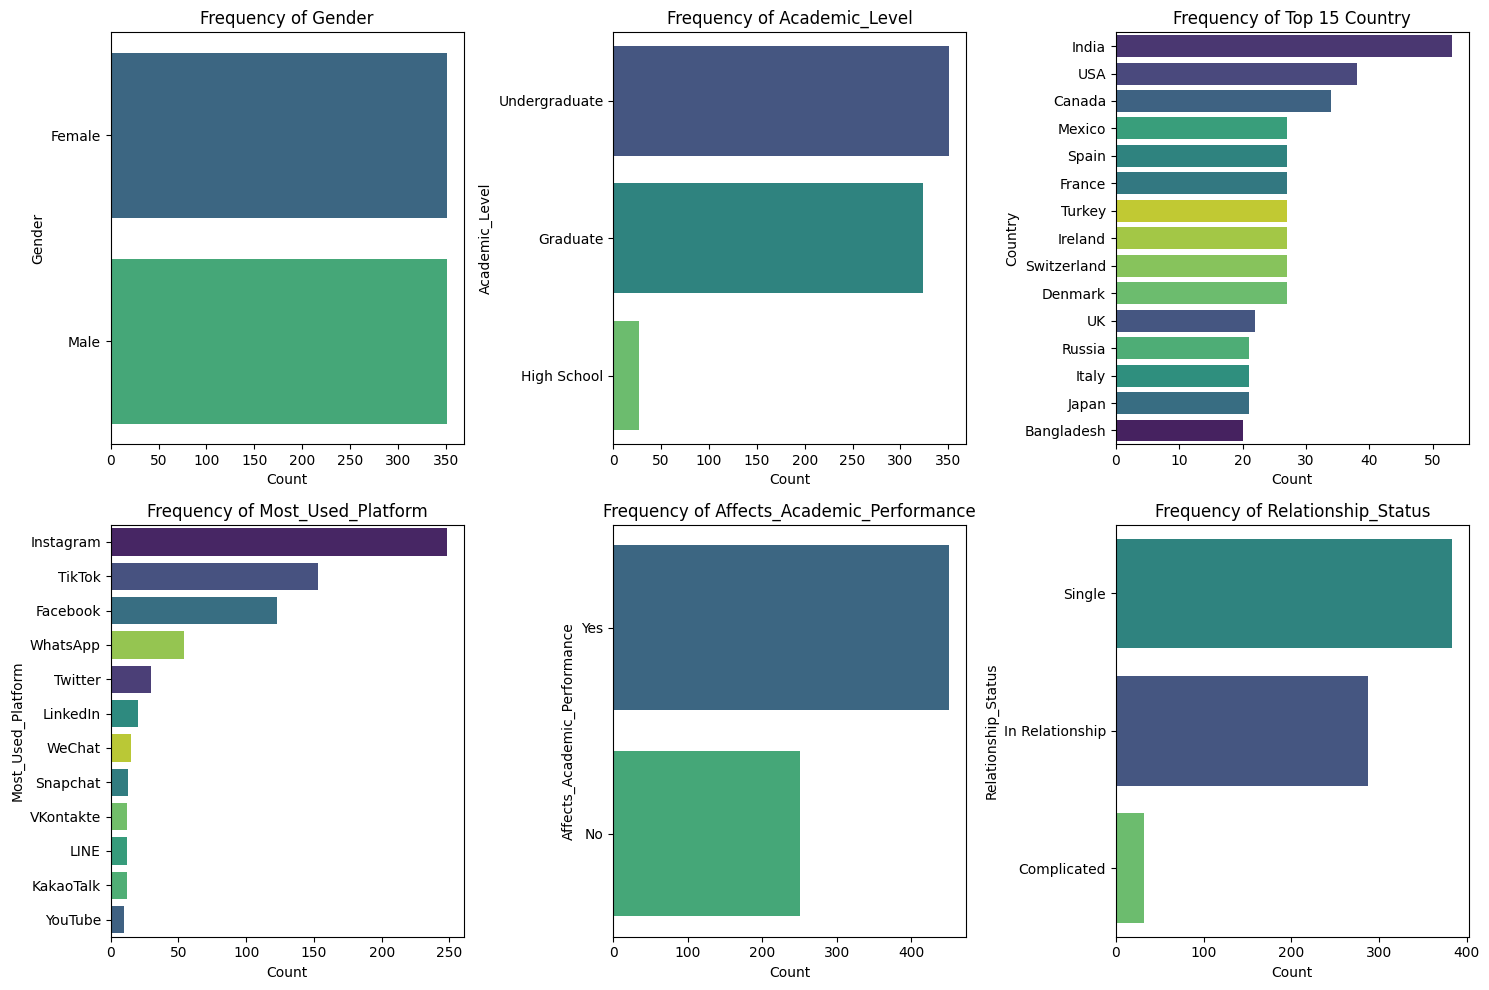

In [ ]:
# 1. Select the categorical columns from the df_cleaned DataFrame.
categorical_columns_cleaned = df_cleaned.select_dtypes(include='object').columns
print("Categorical columns in df_cleaned:")
print(categorical_columns_cleaned)

# 2. and 3. For each categorical column, calculate and display frequency counts and proportions.
print("\nFrequency Counts and Proportions for Categorical Columns:")
for col in categorical_columns_cleaned:
    print(f"\nColumn: {col}")
    frequency_counts = df_cleaned[col].value_counts()
    proportions = df_cleaned[col].value_counts(normalize=True) * 100

    display(pd.DataFrame({'Frequency': frequency_counts, 'Proportion (%)': proportions}))

# 5. Generate count plots for each categorical column.
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns_cleaned):
    plt.subplot(2, 3, i + 1)
    # Modified: For the 'Country' column, show only the top N countries (since there are many countries, the chart would be saturated if all were included)
    if col == 'Country':
        top_n = 15 # You can adjust this number
        top_countries = df_cleaned[col].value_counts().nlargest(top_n).index
        sns.countplot(data=df_cleaned[df_cleaned[col].isin(top_countries)], y=col, order=top_countries, hue=col, palette='viridis', legend=False)
        plt.title(f'Frequency of Top {top_n} {col}')
    else:
        # Modified to use 'y' as 'hue' and legend=False to avoid FutureWarning
        sns.countplot(data=df_cleaned, y=col, order=df_cleaned[col].value_counts().index, hue=col, palette='viridis', legend=False)
        plt.title(f'Frequency of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

According to the graphs and calculated frequencies, the following conclusions can be drawn:

* The distribution indicates that the data collection was balanced, with 50% female students and 50% male students.
* Half of the students are undergraduates, while the other half are mostly graduate students at 46.15%. High School students represent a small proportion (3.85%).
* The dataset includes students from a wide variety of countries. The most represented countries are India (7.55%), USA (5.41%), and Canada (4.84%). The chart of the top 15 most represented countries shows the geographical diversity of the respondents.
* The most used social media platform by far is Instagram (35.33%), followed by TikTok (21.79%) and Facebook (17.52%). Further down are WhatsApp (7.69%) and Twitter (4.27%).
* 64.25% of students believe that social media use affects their academic performance, while 35.75% believe it does not.
* More than half of the students identify as Single (54.56%), 40.88% are in a relationship, and the rest (4.56%) are "Complicated".

## Phase 5: Summary of initial findings

### Summary of Initial Findings

Students, with an average age of 21, spend an average of around 4.91 hours daily on social media, mostly on Instagram, TikTok, and Facebook. The majority believe that social media affects their academic performance, although there is a large percentage who believe it does not. Most students are single or in a relationship. The average self-assessment of mental health is around 6.23, and the average social media addiction score is around 6.44, suggesting a moderate level of addiction. I still cannot know if the daily hours of social media use are related to any other variable, such as academic performance or nightly sleep hours.

### Insights or Next Steps

* Investigate the relationship between daily social media usage hours and academic performance or mental health scores.
* Analyze if the choice of the most used social media platform correlates with mental health or addiction scores.

## Phase 6: Defining the problem and model

Based on the available data, I will investigate how daily social media usage hours affect average nightly sleep hours. How do daily social media usage hours affect nightly sleep hours among students?

Description of Avg_Daily_Usage_Hours:


,Avg_Daily_Usage_Hours
count,702.000000
mean,4.913533
std,1.239162
min,2.000000
25%,4.100000
50%,4.800000
75%,5.800000
max,8.300000



Description of Sleep_Hours_Per_Night:


,Sleep_Hours_Per_Night
count,702.000000
mean,6.875926
std,1.116842
min,4.000000
25%,6.000000
50%,6.900000
75%,7.700000
max,9.600000


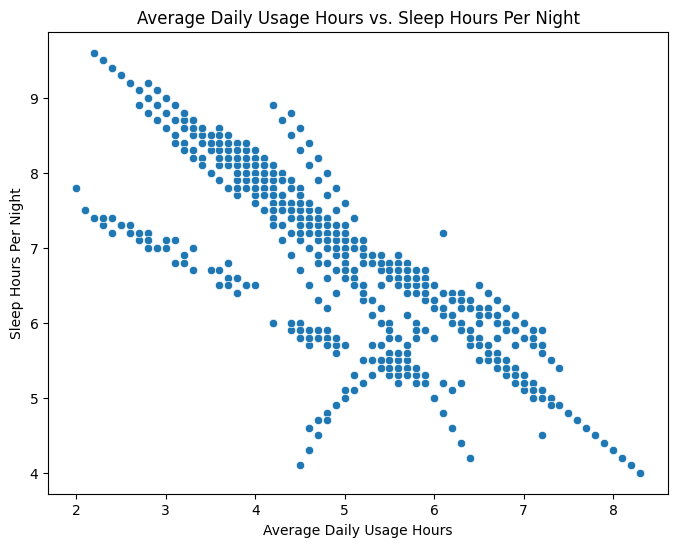

In [ ]:
# Analyze the distributions of the relevant columns
print("Description of Avg_Daily_Usage_Hours:")
display(df_cleaned['Avg_Daily_Usage_Hours'].describe())

# Remove analysis and visualization of the relationship with 'Affects_Academic_Performance'

print("\nDescription of Sleep_Hours_Per_Night:")
display(df_cleaned['Sleep_Hours_Per_Night'].describe())

# Visualize the relationship between Avg_Daily_Usage_Hours and Sleep_Hours_Per_Night
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Avg_Daily_Usage_Hours', y='Sleep_Hours_Per_Night', data=df_cleaned)
plt.title('Average Daily Usage Hours vs. Sleep Hours Per Night')
plt.xlabel('Average Daily Usage Hours')
plt.ylabel('Sleep Hours Per Night')
plt.show()

# Formulate the research question and define the ML problem
research_question = "How do daily social media usage hours affect nightly sleep hours among students?"

# Sleep_Hours_Per_Night is a numerical variable

In [ ]:
# Calculate the Pearson correlation coefficient between 'Avg_Daily_Usage_Hours' and 'Sleep_Hours_Per_Night'
correlation = df_cleaned['Avg_Daily_Usage_Hours'].corr(df_cleaned['Sleep_Hours_Per_Night'], method='pearson')

print(f"Pearson correlation coefficient between Avg_Daily_Usage_Hours and Sleep_Hours_Per_Night: {correlation:.2f}")

Pearson correlation coefficient between Avg_Daily_Usage_Hours and Sleep_Hours_Per_Night: -0.79


According to the Pearson correlation coefficient r between "Average Daily Usage Hours" and "Sleep Hours Per Night" is -0.79. This value indicates a very strong negative relationship, suggesting that as the average number of hours students spend on social media increases, the number of hours they sleep per night decreases. This can be easily seen in the scatter plot.

### Machine Learning Model

I decided to choose the linear regression model to determine how social media usage hours affect average nightly sleep hours because the variables are numerical and I want to explore the basic relationship between these two variables and how exclusive this relationship is with respect to other variables.

## Phase 7: Feature selection

In [ ]:
from sklearn.model_selection import train_test_split

# Define the predictor variable (X) and the target variable (y)
X = df_cleaned[['Avg_Daily_Usage_Hours']]
y = df_cleaned['Sleep_Hours_Per_Night']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (561, 1)
Shape of X_test: (141, 1)
Shape of y_train: (561,)
Shape of y_test: (141,)


I choose these features because I believe there can be a very strong relationship between both variables. And they are data that seem distant in collection as they are objective.

In [ ]:
from sklearn.linear_model import LinearRegression

# Create a LinearRegression model instance
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

LinearRegression()

## Phase 8: Implementation and training of the model

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and display Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Calculate and display the R-squared coefficient
r2 = r2_score(y_test, y_pred)
print(f"R-squared Coefficient (R2): {r2:.2f}")

Mean Squared Error (MSE): 0.52
R-squared Coefficient (R2): 0.54


In [ ]:
# Access the intercept and coefficient
intercept = model.intercept_
coefficient = model.coef_[0]

# Print the intercept and coefficient
print(f"Intercept: {intercept:.2f}")
print(f"Coefficient for Avg_Daily_Usage_Hours: {coefficient:.2f}")

Intercept: 10.43
Coefficient for Avg_Daily_Usage_Hours: -0.72


## Phase 9: Communication of results

As seen in the results, the Mean Squared Error (MSE) is 0.52. Therefore, the model's predictions for nightly sleep hours have a quadratic error of around 0.52 hours. The coefficient of determination (R-squared) is 0.54, meaning that 54% of the variation in students' nightly sleep hours is due to the daily hours spent on social media, according to the model. The remaining 46% is due to other factors. This suggests that social media use is a very important factor in the amount of sleep, but there are also other contributing factors. The intercept is 10.43, so if a student had zero daily social media usage, they would sleep approximately 10.43 hours per night. The coefficient for the average daily social media usage hours is -0.72, indicating that for every hour increase in daily social media use, the average number of nightly sleep hours decreases by approximately 0.72 hours. This also confirms the negative relationship seen earlier in the Pearson correlation coefficient r. Below you can see the graph showing the scatter plot and the regression line.

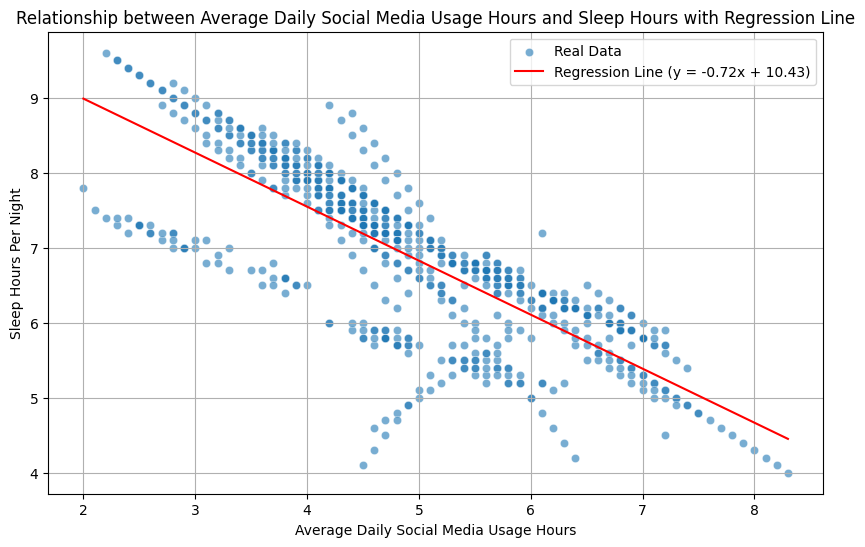

In [ ]:
# Generate the scatter plot with the regression line
import matplotlib.pyplot as plt # Import matplotlib.pyplot

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg_Daily_Usage_Hours', y='Sleep_Hours_Per_Night', data=df_cleaned, label='Real Data', alpha=0.6)

# Plot the regression line
# The regression line is based on the calculated intercept and coefficient
x_values = np.linspace(df_cleaned['Avg_Daily_Usage_Hours'].min(), df_cleaned['Avg_Daily_Usage_Hours'].max(), 100)
y_values = model.intercept_ + model.coef_[0] * x_values
plt.plot(x_values, y_values, color='red', label=f'Regression Line (y = {model.coef_[0]:.2f}x + {model.intercept_:.2f})')

plt.title('Relationship between Average Daily Social Media Usage Hours and Sleep Hours with Regression Line')
plt.xlabel('Average Daily Social Media Usage Hours')
plt.ylabel('Sleep Hours Per Night')
plt.legend()
plt.grid(True)
plt.show()

## Phase 10: Implementation proposals

What could be done in the future is to measure the relationship of each variable with nightly sleep hours to know how much each variable can affect them, and also relate them to academic performance and mental health level. Knowing how each variable affects the target variables, measures can be taken to reduce these effects. A basic measure could be reducing social media hours or offering other more appealing options that do not include screens. This is difficult because adolescents can spend hours on social media, and it's rare to find teenagers who don't, coupled with the fact that they reinforce each other, as if the majority in a classroom use their phones, the few who don't have to resort to using them. It's a global problem that affects more and more people. Early intervention programs could be used to indicate, for example, if a student is at higher risk of their academic performance being affected by social media use. This is based on their usage patterns and could lead to educational institutions offering support or resources.

The results can serve as a starting point for deeper research, exploring the specific mechanisms by which social media affects performance and sleep, or investigating the effectiveness of different interventions. My idea is to take these results and those from other databases to intervene later with my own projects.

More variables that could affect the aforementioned variables could also be included, to cover more ground and have more predictive options.